This notebook contains functionality to perform the following:

Implement way to define and process the Tobacco dataset (raw_test.csv) into something usable. Process and format a recent version of athal_starr_hidra.tsv, including padding to sequence length 153. Process, visualize, and format ATAC data (atac.expression_with_seq.tsv), including ways to downsample. Process and save BAC dataset (athal_bac.intro.tsv), including trimming.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

Mounted at /content/drive
/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import math

plt.rcParams['agg.path.chunksize'] = 10000

## Processes Tobacco Dataset

In [ ]:
# load in data

df = pd.read_csv("data/raw/test_data/raw_test.csv", header=5)

In [ ]:
df

,variant,type,pos,var.nt,enrichment
0,1.5insA,insertion,1.5,A,-0.073000
1,1.5insC,insertion,1.5,C,0.006000
2,1.5insG,insertion,1.5,G,-0.054000
3,1.5insT,insertion,1.5,T,-0.184000
4,2.5insA,insertion,2.5,A,-0.037000
...,...,...,...,...,...
1215,152T>C,substitution,152.0,C,-0.140368
1216,152T>G,substitution,152.0,G,-0.068632
1217,153C>A,substitution,153.0,A,0.158253
1218,153C>G,substitution,153.0,G,-0.126364


In [ ]:
sum(df.enrichment.isnull())

14

In [ ]:
df = df[np.logical_not(df.enrichment.isnull())]  # get rid of null rows

In [ ]:
df.type.unique()

array(['insertion', 'deletion', 'substitution'], dtype=object)

In [ ]:
df[df["type"] == "deletion"]

,variant,type,pos,var.nt,enrichment
608,1delA,deletion,1.0,X,0.023012
609,2delG,deletion,2.0,X,0.086760
610,3delA,deletion,3.0,X,-0.011659
611,4delT,deletion,4.0,X,-0.039737
612,5delC,deletion,5.0,X,0.062942
...,...,...,...,...,...
756,149delC,deletion,149.0,X,-0.128722
757,150delC,deletion,150.0,X,-0.128722
758,151delT,deletion,151.0,X,-0.119739
759,152delT,deletion,152.0,X,-0.119739


In [ ]:
thirty_five_s = "AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACGAGGAGCATCGTGGAAAAAGAAGACGTTCCAACCACGTCTTCAAAGCAAGTGGATTGATGTGACATCTCCACTGACGTAAGGGATGACGCACAATCCCACTATCCTTC"

In [ ]:
print(len(thirty_five_s))
from collections import Counter
Counter(thirty_five_s)

153


Counter({'A': 45, 'C': 45, 'G': 34, 'T': 29})

In [ ]:
def insertion(base_enhancer, position, nucleotide):
  base_enhancer = [i for i in base_enhancer]
  base_enhancer.insert(math.floor(position), nucleotide)
  return "".join(base_enhancer)[:-1]  # [:-1] to reach len 153

def deletion(base_enhancer, position):
  base_enhancer = [i for i in base_enhancer]
  base_enhancer.pop(int(position)-1)
  return "".join(base_enhancer+["X"]) # +["X"] to reach len 153

def substitution(base_enhancer, position, nucleotide):
  base_enhancer = [i for i in base_enhancer]
  base_enhancer[int(position)-1] = nucleotide
  return "".join(base_enhancer)

In [ ]:
def process_change(base_enhancer, df):
  sequences_list = []
  for i in range(df.shape[0]):
    position = df.iloc[i, :]["pos"]
    nucleotide = df.iloc[i, :]["var.nt"]
    if df.iloc[i, :]["type"] == "insertion":
      sequences_list.append(insertion(base_enhancer, position, nucleotide))
    elif df.iloc[i, :]["type"] == "deletion":
      sequences_list.append(deletion(base_enhancer, position))
    else:
      sequences_list.append(substitution(base_enhancer, position, nucleotide))

  df["sequence"] = sequences_list

  return df

process_change(thirty_five_s, df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,variant,type,pos,var.nt,enrichment,sequence
0,1.5insA,insertion,1.5,A,-0.073000,AAGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...
1,1.5insC,insertion,1.5,C,0.006000,ACGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...
2,1.5insG,insertion,1.5,G,-0.054000,AGGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...
3,1.5insT,insertion,1.5,T,-0.184000,ATGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...
4,2.5insA,insertion,2.5,A,-0.037000,AGAATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...
...,...,...,...,...,...,...
1215,152T>C,substitution,152.0,C,-0.140368,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...
1216,152T>G,substitution,152.0,G,-0.068632,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...
1217,153C>A,substitution,153.0,A,0.158253,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...
1218,153C>G,substitution,153.0,G,-0.126364,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...


In [ ]:
new_df = process_change(thirty_five_s, df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
(new_df.sequence.str.len() == 153).all()

True

In [ ]:
# new_df.loc[:,"sequence"] += "X"*(249-153)

In [ ]:
(new_df.sequence.str.len() == 249).all()

False

In [ ]:
new_df = new_df.rename(columns={"enrichment":"target"})

In [ ]:
new_df = new_df[["sequence", "target"]]

In [ ]:
new_df

,sequence,target
0,AAGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...,-0.073000
1,ACGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...,0.006000
2,AGGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...,-0.054000
3,ATGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...,-0.184000
4,AGAATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCAC...,-0.037000
...,...,...
1215,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...,-0.140368
1216,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...,-0.068632
1217,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...,0.158253
1218,AGATCTCTCTGCCGACAGTGGTCCCAAAGATGGACCCCCACCCACG...,-0.126364


In [ ]:
new_df.to_csv("data/processed/validation.csv", index=False)

## Process Arabidopsis Genome Data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import time

%matplotlib inline

In [ ]:
downsize = True

In [ ]:
column_names = ["chromosome", 
                "start_coord", 
                "end_coord", 
                "sequence", 
                "raw_control_coverage", 
                "raw_treatment_coverage", 
                "norm_control_coverage", 
                "norm_treatment_coverage"]

In [ ]:
df = pd.read_csv('data/raw/athal_starr_hidra.tsv', sep="\t", header=None)
df.columns = column_names

In [ ]:
df.chromosome.unique()

array(['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'chloroplast',
       'mitochondria'], dtype=object)

In [ ]:
df = df[df.chromosome.isin(["Chr"+str(i) for i in range(1,6)])]  # keep rows with "Chr" in the chromosome column

In [ ]:
if downsize:
  df = df.iloc[::16, :]  # select every nth row

In [ ]:
odds = [s for s in list(set("".join(df.sequence))) if s not in ["A", "T", "C", "G"]]
odds

['W', 'N', 'M', 'K', 'Y', 'D', 'R', 'S']

In [ ]:
mask = df.sequence.str.contains("|".join(odds))  # true if contains weird characters, false if contains only ATCG
df = df[np.logical_not(mask)]  # keep only rows without weird characters

In [ ]:
df

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage
0,Chr1,0,145,CCCTAAACCCTAAACCCTAAACCCTAAACCTCTGAATCCTTAATCC...,15,46,0.34,1.47
16,Chr1,80,225,AATCCCTAAATACCTAATTCCCTAAACCCGAAACCGGTTTCTCTGG...,19,48,0.43,1.53
32,Chr1,160,305,CGTTTTTATGTAATTGCTTATTGTTGTGTGTAGATTTTTTAAAAAT...,16,30,0.36,0.96
48,Chr1,240,385,GGTTTTCTTTCCTTCACTTAGCTATGGATGGTTTATCTTCATTTGT...,12,11,0.27,0.35
64,Chr1,320,465,TGGGAATGTGAGTCTCTTATTGTAACCTTAGGGTTGGTTTATCTCA...,16,13,0.36,0.41
...,...,...,...,...,...,...,...,...
23829056,Chr5,26975000,26975145,AAATAAGGTAGAGTGACAATTCTTTCTAATGTTCATTTGAAATAAA...,68,28,1.55,0.89
23829072,Chr5,26975080,26975225,AAAATAAAAATAAAATAAAGTAGAGTGAACCTAACATTTTGGAAGA...,56,29,1.28,0.92
23829088,Chr5,26975160,26975305,CCGACCCGACCACTTAACCACAAAACAATTTCAAAATTATGAAGCA...,61,30,1.39,0.96
23829104,Chr5,26975240,26975385,ATGGGCTTGACCCGCTTGTGCTCACGGCCGGCTCTGGTCTAAACAC...,45,23,1.03,0.73


In [ ]:
df = df[(df.raw_control_coverage >= 30) & (df.raw_treatment_coverage >= 5)]

In [ ]:
df

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage
704,Chr1,3520,3665,TAAAACCATACCAATTAAACCGGAGATCCATATTAATTTAATTAAG...,32,31,0.73,0.99
720,Chr1,3600,3745,AAACGCTGACTTCACTGTCTTCCTCCCTCCAAATTATTAGATATAC...,32,31,0.73,0.99
736,Chr1,3680,3825,TACAGATTACAGAGAGCGAGAGAGATCGACGGCGAAGCTCTTTACC...,43,34,0.98,1.08
784,Chr1,3920,4065,CCGAATTTTCTGAATTTCATTTGCAAGTAATCGATTTAGGTTTTTG...,34,25,0.77,0.80
800,Chr1,4000,4145,TCAAAGTACAAATCGAGAGATGCTATGTGGTACTTCTTCTCTCGTA...,36,33,0.82,1.05
...,...,...,...,...,...,...,...,...
23829056,Chr5,26975000,26975145,AAATAAGGTAGAGTGACAATTCTTTCTAATGTTCATTTGAAATAAA...,68,28,1.55,0.89
23829072,Chr5,26975080,26975225,AAAATAAAAATAAAATAAAGTAGAGTGAACCTAACATTTTGGAAGA...,56,29,1.28,0.92
23829088,Chr5,26975160,26975305,CCGACCCGACCACTTAACCACAAAACAATTTCAAAATTATGAAGCA...,61,30,1.39,0.96
23829104,Chr5,26975240,26975385,ATGGGCTTGACCCGCTTGTGCTCACGGCCGGCTCTGGTCTAAACAC...,45,23,1.03,0.73


In [ ]:
df["target"] = np.log2(df.norm_control_coverage/df.norm_treatment_coverage)

<ipython-input-15-0fccf54a3f3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = np.log2(df.norm_control_coverage/df.norm_treatment_coverage)


In [ ]:
df

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target
704,Chr1,3520,3665,TAAAACCATACCAATTAAACCGGAGATCCATATTAATTTAATTAAG...,32,31,0.73,0.99,-0.439532
720,Chr1,3600,3745,AAACGCTGACTTCACTGTCTTCCTCCCTCCAAATTATTAGATATAC...,32,31,0.73,0.99,-0.439532
736,Chr1,3680,3825,TACAGATTACAGAGAGCGAGAGAGATCGACGGCGAAGCTCTTTACC...,43,34,0.98,1.08,-0.140178
784,Chr1,3920,4065,CCGAATTTTCTGAATTTCATTTGCAAGTAATCGATTTAGGTTTTTG...,34,25,0.77,0.80,-0.055142
800,Chr1,4000,4145,TCAAAGTACAAATCGAGAGATGCTATGTGGTACTTCTTCTCTCGTA...,36,33,0.82,1.05,-0.356694
...,...,...,...,...,...,...,...,...,...
23829056,Chr5,26975000,26975145,AAATAAGGTAGAGTGACAATTCTTTCTAATGTTCATTTGAAATAAA...,68,28,1.55,0.89,0.800391
23829072,Chr5,26975080,26975225,AAAATAAAAATAAAATAAAGTAGAGTGAACCTAACATTTTGGAAGA...,56,29,1.28,0.92,0.476438
23829088,Chr5,26975160,26975305,CCGACCCGACCACTTAACCACAAAACAATTTCAAAATTATGAAGCA...,61,30,1.39,0.96,0.533979
23829104,Chr5,26975240,26975385,ATGGGCTTGACCCGCTTGTGCTCACGGCCGGCTCTGGTCTAAACAC...,45,23,1.03,0.73,0.496676


In [ ]:
df["set"] = "train"

<ipython-input-17-1eadf7f33e53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["set"] = "train"


In [ ]:
import random

picked = ["Chr2","Chr4"]
random.Random(1202).shuffle(picked)

In [ ]:
# set val and test by chromosome we want
df.loc[df.chromosome == picked[0], "set"] = "val"
df.loc[df.chromosome == picked[1], "set"] = "test"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
picked

['Chr2', 'Chr4']

In [ ]:
df.groupby("set").count()

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target
set,,,,,,,,,
test,161665,161665,161665,161665,161665,161665,161665,161665,161665
train,702867,702867,702867,702867,702867,702867,702867,702867,702867
val,167044,167044,167044,167044,167044,167044,167044,167044,167044


In [ ]:
df

,chromosome,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target,set
704,Chr1,3520,3665,TAAAACCATACCAATTAAACCGGAGATCCATATTAATTTAATTAAG...,32,31,0.73,0.99,-0.439532,train
720,Chr1,3600,3745,AAACGCTGACTTCACTGTCTTCCTCCCTCCAAATTATTAGATATAC...,32,31,0.73,0.99,-0.439532,train
736,Chr1,3680,3825,TACAGATTACAGAGAGCGAGAGAGATCGACGGCGAAGCTCTTTACC...,43,34,0.98,1.08,-0.140178,train
784,Chr1,3920,4065,CCGAATTTTCTGAATTTCATTTGCAAGTAATCGATTTAGGTTTTTG...,34,25,0.77,0.80,-0.055142,train
800,Chr1,4000,4145,TCAAAGTACAAATCGAGAGATGCTATGTGGTACTTCTTCTCTCGTA...,36,33,0.82,1.05,-0.356694,train
...,...,...,...,...,...,...,...,...,...,...
23829056,Chr5,26975000,26975145,AAATAAGGTAGAGTGACAATTCTTTCTAATGTTCATTTGAAATAAA...,68,28,1.55,0.89,0.800391,train
23829072,Chr5,26975080,26975225,AAAATAAAAATAAAATAAAGTAGAGTGAACCTAACATTTTGGAAGA...,56,29,1.28,0.92,0.476438,train
23829088,Chr5,26975160,26975305,CCGACCCGACCACTTAACCACAAAACAATTTCAAAATTATGAAGCA...,61,30,1.39,0.96,0.533979,train
23829104,Chr5,26975240,26975385,ATGGGCTTGACCCGCTTGTGCTCACGGCCGGCTCTGGTCTAAACAC...,45,23,1.03,0.73,0.496676,train


In [ ]:
df = df[["sequence", "target", "set"]]

In [ ]:
len(df.sequence.tolist()[0])

145

In [ ]:
153-len(df.sequence.tolist()[0])

8

In [ ]:
(df.sequence.str.len() == 145).all()

True

In [ ]:
8*"X"

'XXXXXXXX'

In [ ]:
df["sequence"] += "XXXXXXXX"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
(df.sequence.str.len() == 153).all()

True

In [ ]:
df.to_csv("data/processed/arabidopsis_processed_every16_padded.csv", index=False)  # write to file

## Process Atac Data

In [ ]:
# Load in entire dataset if possible
# average all columns
# filter based on what David said:
#   threshold for open: top 1% excluding very top 0.1% -- ?? rows
#   threshold for closed: zero counts (?? rows)? Bottom 1% (?? rows)?
# save 

In [ ]:
df_atac = pd.read_csv("data/raw/new_data/atac.expression_with_seq.tsv", sep="\t", skiprows=lambda x: x % 4, header=None)  # read in every 4th row

In [ ]:
samples = ["bud-green_rep1",
           "bud-green_rep2",
           "bud-yellow_rep1",
           "bud-yellow_rep2",
           "peduncle-down-15cm_rep1",
           "peduncle-down-15cm_rep2",
           "seed-21d_rep1",
           "seed-21d_rep2",
           "silique-1week_rep1",
           "silique-1week_rep2",
           "silique-2week_rep1",
           "silique-2week_rep2",
           "silique-3week_rep1",
           "silique-3week_rep2",
           "silique-4week_rep1",
           "silique-4week_rep2",
           "stem-down-15cm_rep1",
           "stem-down-15cm_rep2"]

column_names = ["ref", 
                "start_coord", 
                "end_coord",
                "sequence"]
                
for item in samples:
  column_names.append(item+"_raw")
  column_names.append(item+"_norm")

df_atac.columns = column_names

In [ ]:
df_atac.ref.unique()

array(['N1', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N19', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9',
       'chr_contigs', 'napus_chloroplast', 'napus_mitochondrion'],
      dtype=object)

In [ ]:
df_atac = df_atac[np.logical_not(df_atac.ref.isin(["chr_contigs", "napus_chloroplast", "napus_mitochondrion"]))]  # get rid of weirdo columns

In [ ]:
df_atac.shape

(10673985, 40)

In [ ]:
# calculate number of ns in each row
df_atac["num_n"] = df_atac.sequence.str.count("N")
df_atac["presence_n"] = [1 if "N" in s else 0 for s in df_atac.sequence]

In [ ]:
df_atac.groupby("ref").mean()

,start_coord,end_coord,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,bud-yellow_rep2_raw,bud-yellow_rep2_norm,...,silique-4week_rep1_raw,silique-4week_rep1_norm,silique-4week_rep2_raw,silique-4week_rep2_norm,stem-down-15cm_rep1_raw,stem-down-15cm_rep1_norm,stem-down-15cm_rep2_raw,stem-down-15cm_rep2_norm,num_n,presence_n
ref,,,,,,,,,,,,,,,,,,,,,
N1,13612002.0,13612155.0,15.760097,2.046284e-07,18.442653,2.232429e-07,27.439531,2.365989e-07,19.516593,2.342348e-07,...,34.218864,2.638147e-07,16.042982,1.955457e-07,25.374641,2.320108e-07,15.215547,2.028678e-07,8.676534,0.068100
N10,8955498.0,8955651.0,17.410611,2.260451e-07,20.874437,2.526803e-07,30.901233,2.664510e-07,22.406730,2.689219e-07,...,38.040668,2.932848e-07,16.442016,2.004108e-07,27.828924,2.544470e-07,16.528075,2.203657e-07,7.395136,0.058937
N11,23322878.0,23323031.0,21.183150,2.749976e-07,24.319738,2.943941e-07,35.461056,3.057711e-07,24.486134,2.939017e-07,...,41.770837,3.220428e-07,21.996226,2.681087e-07,32.349477,2.957740e-07,20.035920,2.671238e-07,15.296648,0.114905
N12,22832122.0,22832275.0,17.741347,2.303333e-07,20.385837,2.467664e-07,31.568892,2.722070e-07,20.911902,2.509973e-07,...,37.066680,2.857747e-07,18.587212,2.265471e-07,29.323441,2.681102e-07,18.434673,2.457759e-07,17.319752,0.131560
N13,33887375.0,33887528.0,17.522212,2.274876e-07,20.393877,2.468659e-07,30.858725,2.660832e-07,21.554491,2.587049e-07,...,38.092654,2.936816e-07,19.147150,2.333784e-07,28.781423,2.631565e-07,18.056657,2.407461e-07,13.662394,0.102965
N14,27595811.0,27595964.0,16.958299,2.201700e-07,19.385492,2.346586e-07,29.736247,2.564054e-07,20.384463,2.446572e-07,...,37.802977,2.914552e-07,18.581178,2.264793e-07,27.893072,2.550355e-07,17.195156,2.292595e-07,15.193954,0.113571
N15,25171849.0,25172002.0,19.579745,2.541924e-07,23.100609,2.796381e-07,34.245874,2.952895e-07,24.076760,2.889836e-07,...,41.998728,3.238001e-07,21.431380,2.612220e-07,32.350673,2.957880e-07,20.786311,2.771320e-07,15.265920,0.114294
N16,19702456.0,19702609.0,16.733311,2.172526e-07,19.644759,2.377978e-07,30.246838,2.608078e-07,20.791422,2.495372e-07,...,37.791253,2.913612e-07,17.666078,2.153296e-07,27.405550,2.505741e-07,16.635459,2.217990e-07,15.682913,0.116203
N17,24411677.0,24411830.0,17.056011,2.214419e-07,19.293960,2.335487e-07,29.968325,2.584035e-07,20.462004,2.455903e-07,...,37.568339,2.896399e-07,18.884170,2.301765e-07,28.221633,2.580377e-07,17.289911,2.305205e-07,14.293629,0.107560


In [ ]:
# remove all rows that have an N in them
odds = [s for s in list(set("".join(df_atac.sequence))) if s not in ["A", "T", "C", "G"]]
odds

['N']

In [ ]:
mask = df_atac.sequence.str.contains("|".join(odds))  # true if contains weird characters, false if contains only ATCG
df_atac = df_atac[np.logical_not(mask)]  # keep only rows without weird characters

In [ ]:
df_atac.ref.unique()

array(['N1', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N19', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9'],
      dtype=object)

In [ ]:
before = df_atac.groupby("ref").count().iloc[:,0]
before_prop = before/sum(before)

In [ ]:
df_atac["norm_read_avg"] = df_atac.iloc[:,[True if "_norm" in s else False for s in df_atac.columns]].mean(axis=1)
df_atac["raw_read_sum"] = df_atac.iloc[:,[True if "_raw" in s else False for s in df_atac.columns]].sum(axis=1)

In [ ]:
df_atac.shape

(9664937, 44)

In [ ]:
# see what bottom 1% VS. zero counts looks like

sum(df_atac["raw_read_sum"] == 0)  # = 979, not enough

979

In [ ]:
# sort dataset

df_atac = df_atac.sort_values("norm_read_avg")

In [ ]:
for item in ["A", "T", "C", "G"]:  # create new columns with the counts of sequences in "include"
  df_atac[item] = df_atac.sequence.str.count(item)

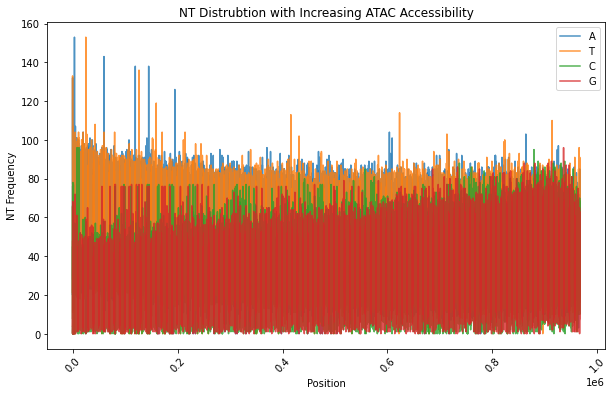

In [ ]:
# plot what ATCG looks like after sorting

x = df_atac[["A", "T", "C", "G"]][::10]

fig = plt.figure(figsize=[10,6])
fig.patch.set_facecolor('white')

position = [i for i in range(x.shape[0])]

plt.plot(position, x["A"], label="A", alpha = 0.8)
plt.plot(position, x["T"], label="T", alpha = 0.8)
plt.plot(position, x["C"], label="C", alpha = 0.8)
plt.plot(position, x["G"], label="G", alpha = 0.8)

plt.xticks(rotation=45)
plt.xlabel("Position")
plt.ylabel("NT Frequency")
plt.title("NT Distrubtion with Increasing ATAC Accessibility")
plt.legend()

plt.show()

In [ ]:
df_atac

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,stem-down-15cm_rep2_raw,stem-down-15cm_rep2_norm,num_n,presence_n,norm_read_avg,raw_read_sum,A,T,C,G
3792940,N14,52700119,52700272,ACCATAAACAAAATTTTATTAATAATATTATTTTTAAATAAAATAA...,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0,0.000000,0,76,65,8,4
3631981,N14,41754907,41755060,CCGGATCCGGATAATAAAATGTTGGATCCGTCAAGGCCGGATCCGG...,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0,0.000000,0,45,34,31,43
3044866,N14,1831087,1831240,CGCCAACATATGAAAAAGTTCAAAGAGGTTTCCATAGATTTTGAGA...,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0,0.000000,0,66,42,22,23
3631980,N14,41754839,41754992,AAATGTTGGATCCGTCAAGGCCGGATCCGGATCCGGATAATAAAAT...,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0,0.000000,0,43,33,33,44
3044867,N14,1831155,1831308,TGTTTCAATGCATATTTGCATCCTTCGCCAACATATGAAAAAGTTC...,0,0.000000,0,0.000000,0,0.000000,...,0,0.000000,0,0,0.000000,0,57,48,26,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334102,N9,17177616,17177769,AAAGTGATTCATCCTGCTTTGATTGGAACGACGAAGAAGCTGTCCT...,21351,0.000277,23046,0.000279,43004,0.000371,...,30824,0.000411,0,0,0.000402,683898,44,46,35,28
10334099,N9,17177412,17177565,CTTTATGTATCCAAATCAAGCTTCTTACAAAGTGATTCATCCTGCT...,21600,0.000280,23289,0.000282,43191,0.000372,...,31076,0.000414,0,0,0.000403,687248,46,47,33,27
10334104,N9,17177752,17177905,GATTCTCCACCACTTTATGTATCCAAATCAAGCTTCTTACAAAGTG...,21954,0.000285,23754,0.000288,43491,0.000375,...,31322,0.000418,0,0,0.000406,691153,45,45,37,26
7213473,N19,46415066,46415219,ATCCCACTTTCAAATCAGGTGATTCCAGTTTCCCAGTTTGGGAATA...,29741,0.000386,31911,0.000386,47591,0.000410,...,38378,0.000512,0,0,0.000465,775396,46,44,31,32


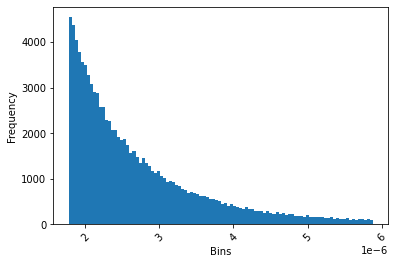

In [ ]:
# plot highest 1.1% - highest 0.1%

x1 = df_atac.norm_read_avg[int(df_atac.shape[0]*(1-0.011)):int(df_atac.shape[0]*(1-0.001))]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x1, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

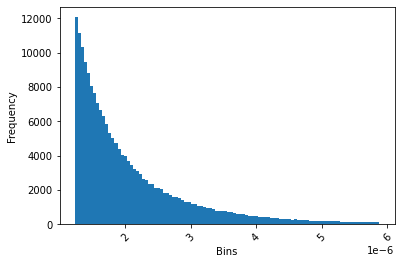

In [ ]:
# plot highest 2.1% - highest 0.1%

x2 = df_atac.norm_read_avg[int(df_atac.shape[0]*(1-0.021)):int(df_atac.shape[0]*(1-0.001))]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x2, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

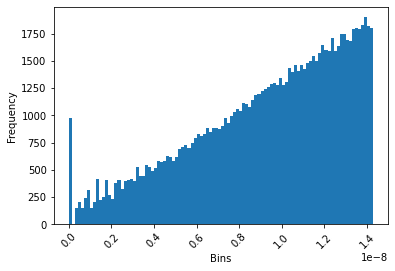

In [ ]:
# plot bottom 1%

x3 = df_atac.norm_read_avg[:int(df_atac.shape[0]*(0.01))]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x3, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

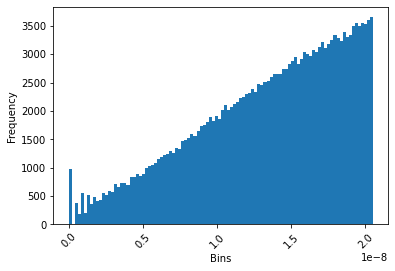

In [ ]:
# plot bottom 2%

x4 = df_atac.norm_read_avg[:int(df_atac.shape[0]*(0.02))]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x4, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

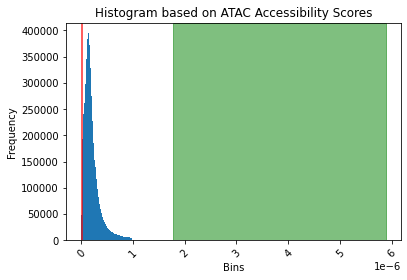

In [ ]:
# what will these chunks look like when plotted with everything else?

# plot bottom 1%

x = df_atac.norm_read_avg[:int(df_atac.shape[0]*0.97)]  # get rid of weird outliers

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x, bins=100)

# x1 goes with x3, x2 goes with x4

lower_down = list(x3)[0]  # value that starts off, doesn't change
upper_down = list(x4)[-1]  # or list(x4)[-1]
plt.axvspan(lower_down, upper_down, color='red', alpha=0.5)

lower_up = list(x1)[0]  # or list(x1)[0]
upper_up = list(x2)[-1]  # value that ends off, doesn't change
plt.axvspan(lower_up, upper_up, color='g', alpha=0.5)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

In [ ]:
# get rid of rows that aren't in the top and bottom 2%
bottom_indices = [i for i in range(0,int(df_atac.shape[0]*(0.02)))]
top_indices = [i for i in range(int(df_atac.shape[0]*(1-0.021)),int(df_atac.shape[0]*(1-0.001)))]

df_atac_small = df_atac.iloc[bottom_indices+top_indices, :]

In [ ]:
len(bottom_indices), len(top_indices)

(193298, 193299)

In [ ]:
# see what old vs new size of chromosomes
after = df_atac_small.groupby("ref").count().iloc[:,0]
after_prop = after/sum(after)

In [ ]:
changes = pd.DataFrame(data=[before_prop, after_prop]).transpose()
changes.columns = ["before", "after"]
changes["dif"] = changes["after"] - changes["before"]
changes

,before,after,dif
ref,,,
N1,0.038602,0.041534,0.002932
N10,0.025647,0.026231,0.000585
N11,0.062819,0.059713,-0.003106
N12,0.060340,0.059475,-0.000865
N13,0.092506,0.092815,0.000309
N14,0.074440,0.071871,-0.002570
N15,0.067846,0.063350,-0.004496
N16,0.052990,0.052313,-0.000677
N17,0.066298,0.063293,-0.003004


In [ ]:
# create 0/1 attribute
df_atac_small["target"] = [0]*len(bottom_indices) + [1]*len(top_indices)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_atac_small

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,stem-down-15cm_rep2_norm,num_n,presence_n,norm_read_avg,raw_read_sum,A,T,C,G,target
3792940,N14,52700119,52700272,ACCATAAACAAAATTTTATTAATAATATTATTTTTAAATAAAATAA...,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0,0,0.000000,0,76,65,8,4,0
3631981,N14,41754907,41755060,CCGGATCCGGATAATAAAATGTTGGATCCGTCAAGGCCGGATCCGG...,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0,0,0.000000,0,45,34,31,43,0
3044866,N14,1831087,1831240,CGCCAACATATGAAAAAGTTCAAAGAGGTTTCCATAGATTTTGAGA...,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0,0,0.000000,0,66,42,22,23,0
3631980,N14,41754839,41754992,AAATGTTGGATCCGTCAAGGCCGGATCCGGATCCGGATAATAAAAT...,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0,0,0.000000,0,43,33,33,44,0
3044867,N14,1831155,1831308,TGTTTCAATGCATATTTGCATCCTTCGCCAACATATGAAAAAGTTC...,0,0.000000,0,0.000000,0,0.000000,...,0.000000,0,0,0.000000,0,57,48,26,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227448,N18,24483111,24483264,GCGCAAGAGAGTTTTGCGTCTTTAACTATATGCTATCGAGGCCAAG...,306,0.000004,533,0.000006,589,0.000005,...,0.000004,0,0,0.000006,9947,42,46,34,31,1
6078982,N18,14387423,14387576,GGTATGATCTAGCAATGTTGCATAGATCTAGATAGAATGGTTAGGG...,367,0.000005,296,0.000004,559,0.000005,...,0.000006,0,0,0.000006,10089,41,45,23,44,1
6094395,N18,15435507,15435660,TCCATCCAGACAACATACCATATGCTGGAAAATCACTTATTGTCCA...,561,0.000007,316,0.000004,725,0.000006,...,0.000006,0,0,0.000006,9885,47,46,36,24,1
7683137,N2,22369331,22369484,AAAATTAACACACAAAAGGTGGGCCGGGTCCATTAACGGTCCACAC...,231,0.000003,600,0.000007,580,0.000005,...,0.000004,0,0,0.000006,9865,53,33,35,32,1


In [ ]:
# add set attribute
import random

picked1 = ["N"+str(i) for i in range(1,11)]
picked2 = ["N"+str(i) for i in range(11,20)]
random.Random(1202).shuffle(picked1) 
random.Random(1202).shuffle(picked2)

picked1, picked2

(['N10', 'N3', 'N9', 'N4', 'N1', 'N2', 'N6', 'N7', 'N8', 'N5'],
 ['N17', 'N13', 'N19', 'N11', 'N12', 'N16', 'N14', 'N18', 'N15'])

In [ ]:
df_atac_small["set"] = "train"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_atac_small.loc[df_atac_small.ref == picked1[0], "set"] = "val"
df_atac_small.loc[df_atac_small.ref == picked2[0], "set"] = "val"

df_atac_small.loc[df_atac_small.ref == picked1[1], "set"] = "test"
df_atac_small.loc[df_atac_small.ref == picked2[1], "set"] = "test"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_atac_small.groupby("set").count()

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,stem-down-15cm_rep2_norm,num_n,presence_n,norm_read_avg,raw_read_sum,A,T,C,G,target
set,,,,,,,,,,,,,,,,,,,,,
test,54743,54743,54743,54743,54743,54743,54743,54743,54743,54743,...,54743,54743,54743,54743,54743,54743,54743,54743,54743,54743
train,297244,297244,297244,297244,297244,297244,297244,297244,297244,297244,...,297244,297244,297244,297244,297244,297244,297244,297244,297244,297244
val,34610,34610,34610,34610,34610,34610,34610,34610,34610,34610,...,34610,34610,34610,34610,34610,34610,34610,34610,34610,34610


In [ ]:
# # create target column by averaging over all the norm'd columns

# df_atac["target"] = df_atac.iloc[:,[True if "_norm" in s else False for s in df_atac.columns]].mean(axis=1)

In [ ]:
df_atac_small

,ref,start_coord,end_coord,sequence,bud-green_rep1_raw,bud-green_rep1_norm,bud-green_rep2_raw,bud-green_rep2_norm,bud-yellow_rep1_raw,bud-yellow_rep1_norm,...,num_n,presence_n,norm_read_avg,raw_read_sum,A,T,C,G,target,set
3792940,N14,52700119,52700272,ACCATAAACAAAATTTTATTAATAATATTATTTTTAAATAAAATAA...,0,0.000000,0,0.000000,0,0.000000,...,0,0,0.000000,0,76,65,8,4,0,train
3631981,N14,41754907,41755060,CCGGATCCGGATAATAAAATGTTGGATCCGTCAAGGCCGGATCCGG...,0,0.000000,0,0.000000,0,0.000000,...,0,0,0.000000,0,45,34,31,43,0,train
3044866,N14,1831087,1831240,CGCCAACATATGAAAAAGTTCAAAGAGGTTTCCATAGATTTTGAGA...,0,0.000000,0,0.000000,0,0.000000,...,0,0,0.000000,0,66,42,22,23,0,train
3631980,N14,41754839,41754992,AAATGTTGGATCCGTCAAGGCCGGATCCGGATCCGGATAATAAAAT...,0,0.000000,0,0.000000,0,0.000000,...,0,0,0.000000,0,43,33,33,44,0,train
3044867,N14,1831155,1831308,TGTTTCAATGCATATTTGCATCCTTCGCCAACATATGAAAAAGTTC...,0,0.000000,0,0.000000,0,0.000000,...,0,0,0.000000,0,57,48,26,22,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227448,N18,24483111,24483264,GCGCAAGAGAGTTTTGCGTCTTTAACTATATGCTATCGAGGCCAAG...,306,0.000004,533,0.000006,589,0.000005,...,0,0,0.000006,9947,42,46,34,31,1,train
6078982,N18,14387423,14387576,GGTATGATCTAGCAATGTTGCATAGATCTAGATAGAATGGTTAGGG...,367,0.000005,296,0.000004,559,0.000005,...,0,0,0.000006,10089,41,45,23,44,1,train
6094395,N18,15435507,15435660,TCCATCCAGACAACATACCATATGCTGGAAAATCACTTATTGTCCA...,561,0.000007,316,0.000004,725,0.000006,...,0,0,0.000006,9885,47,46,36,24,1,train
7683137,N2,22369331,22369484,AAAATTAACACACAAAAGGTGGGCCGGGTCCATTAACGGTCCACAC...,231,0.000003,600,0.000007,580,0.000005,...,0,0,0.000006,9865,53,33,35,32,1,train


In [ ]:
df_atac_small[["A", "T", "C", "G"]].mean(axis=0)

A    55.435942
T    55.566820
C    20.977791
G    21.019447
dtype: float64

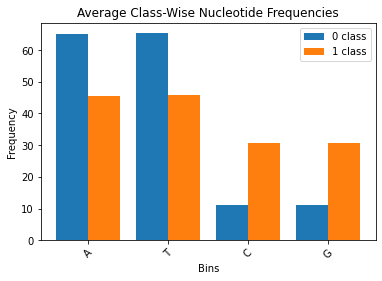

In [ ]:
# get average of A, T, C, G columns for each of 0 and 1 class

x0 = df_atac_small[df_atac_small.target == 0][["A", "T", "C", "G"]].mean(axis=0)
x1 = df_atac_small[df_atac_small.target == 1][["A", "T", "C", "G"]].mean(axis=0)

fig = plt.figure()
fig.patch.set_facecolor('white')

x_axis = np.arange(4)

plt.bar(x_axis - 0.2, x0, 0.4, label = '0 class')
plt.bar(x_axis + 0.2, x1, 0.4, label = '1 class')

plt.xticks(x_axis, ["A", "T", "C", "G"], rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Average Class-Wise Nucleotide Frequencies")
plt.legend()

plt.show()

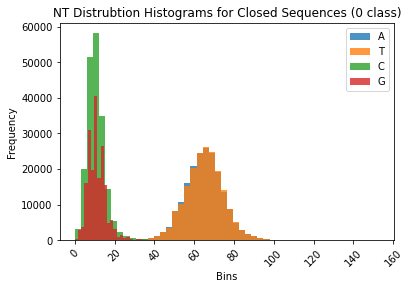

In [ ]:
# overlapping histograms of each NT distribution for 0 class

x0 = df_atac_small[df_atac_small.target == 0][["A", "T", "C", "G"]]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x0["A"], bins=50, alpha=0.8, label="A")
plt.hist(x0["T"], bins=50, alpha=0.8, label="T")
plt.hist(x0["C"], bins=50, alpha=0.8, label="C")
plt.hist(x0["G"], bins=50, alpha=0.8, label="G")

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("NT Distrubtion Histograms for Closed Sequences (0 class)")
plt.legend()

plt.show()

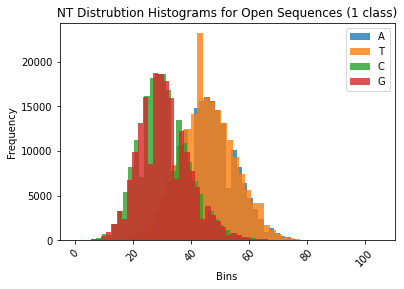

In [ ]:
# overlapping histograms of each NT distribution for 1 class

x1 = df_atac_small[df_atac_small.target == 1][["A", "T", "C", "G"]]

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x1["A"], bins=50, alpha=0.8, label="A")
plt.hist(x1["T"], bins=50, alpha=0.8, label="T")
plt.hist(x1["C"], bins=50, alpha=0.8, label="C")
plt.hist(x1["G"], bins=50, alpha=0.8, label="G")

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("NT Distrubtion Histograms for Open Sequences (1 class)")
plt.legend()

plt.show()

In [ ]:
df_atac_small = df_atac_small.sort_values("start_coord")

In [ ]:
# drop uneccesary columns
# df_atac = df_atac.drop(columns=["ref", "start_coord", "end_coord"]) 
# df_atac = df_atac.loc[:, [False if "raw" in s else True for s in df_atac.columns]]
df_atac_small = df_atac_small[["sequence", "norm_read_avg", "raw_read_sum", "target", "set"]]

In [ ]:
df_atac_small

,sequence,norm_read_avg,raw_read_sum,target,set
4569933,AAAAGACATAAAAATATTAGTATAAAAATAAATAATAAGAAATATT...,1.163000e-08,22,0,train
4569934,CTAATATTATAATAGATTTATAATTTAATATTATGTATTATTTTAA...,4.950000e-09,11,0,train
4569935,CATATAGAAATGTTATATACTATAATAAGTAAATATAAAATATAAG...,1.945000e-08,38,0,train
5867416,GGTTGAACCATGGATTTCGTGACCGCAACAAGGACGGTGGTCATGG...,1.436500e-06,2317,1,train
5867417,GTGTAACAACTCACCTGCCGAATCAACTAACCCCGAAAATGGATGG...,1.598333e-06,2582,1,train
...,...,...,...,...,...
3017908,TCCTCTTTCTTAATTTTTTGTCTTATTGGGCCAAGTTTTAAACTCT...,1.842389e-06,3192,1,test
3017909,ACTTAATCTGCTAGGTAGACAAAACCTTGCGGATGAAGTTAAATGG...,1.457333e-06,2513,1,test
3017926,TTGCCGAGGAATTATCGCGAAATATGAGAGAAATGAATCAAGACAG...,1.563889e-06,2707,1,test
3017927,CTATTAGGCGCTATTTAGTTTGGGCTAAGCCCATTATCATGAAACG...,1.602944e-06,2785,1,test


In [ ]:
# df_atac.to_csv("data/processed/napus_processed_every16.csv", index=False)  # write to file
df_atac_small.to_csv("data/processed/napus_processed_every4_binary_new.csv", index=False)  # write to file

In [ ]:
# see what the top 0.1% of data looks like for bud-green_rep1_raw
x = sorted(df_atac["target"], reverse=True)[int(df_atac.shape[0]*0.01):int(df_atac.shape[0])]  # first element is the largest
len(x)

2392208

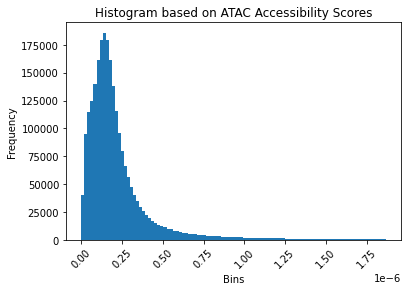

In [ ]:
# explore distribution of bottom 99% of counts 

fig = plt.figure()
fig.patch.set_facecolor('white')

plt.hist(x, bins=100)

plt.xticks(rotation=45)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Histogram based on ATAC Accessibility Scores")

plt.show()

# (I assume histogram of norm'd counts will look the same)

## Process Athal BAC dataset

In [ ]:
df_athal = pd.read_csv("data/raw/new_data/athal_bac.intro.tsv", sep="\t", header=None)

In [ ]:
df_athal

,0,1,2,3,4,5,6,7
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67
...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32


In [ ]:
column_names = ["ref", 
                "start_coord", 
                "end_coord", 
                "sequence", 
                "raw_control_coverage", 
                "raw_treatment_coverage", 
                "norm_control_coverage", 
                "norm_treatment_coverage"]

df_athal.columns = column_names

In [ ]:
df_athal["target"] = np.log2(df_athal.norm_control_coverage/df_athal.norm_treatment_coverage)

In [ ]:
len(df_athal.sequence.tolist()[0])

153

In [ ]:
# remove all rows that have an N in them
odds = [s for s in list(set("".join(df_athal.sequence))) if s not in ["A", "T", "C", "G"]]
odds  # no odds!

[]

In [ ]:
df_athal.ref.unique()  # only one source: https://www.ncbi.nlm.nih.gov/nuccore/AC002387

array(['AC002387.3'], dtype=object)

In [ ]:
(df_athal.sequence.str.len() == 153).all()

True

In [ ]:
# # run if we want to pad this out to 249 bp
# # we can also do this by adding the surrounding sequence? may be problems with this 
# df_athal["sequence"] += "X"*(249-153)
# (df_athal.sequence.str.len() == 249).all()

There are 17 NT that appear at the beginning of the first sequence that don't appear in the second

In [ ]:
153/17  # will num = 4 NTs be enough to knock off all overlap?
# it takes 9 rows to flush out a whole sequence

9.0

In [ ]:
# create set attribute
def trim(chunks):  # takes in list of dfs, returns list but with no overlaps
    num = int((153/17-1)/2)  # how does this get calculated?
    chunks[0] = chunks[0][:-num]  # knock off the last <num> rows from first
    for i in range(1, len(chunks)-1):
        chunks[i] = chunks[i][num:-num]
    chunks[-1] = chunks[-1][num:]  # knock off the first <num> rows from last
    return chunks

chunks = trim(np.array_split(df_athal, 10))

In [ ]:
training = []
validation = []
test = []

for i in range(len(chunks)):   # divides each of n chunks into train/test/val, append to train/test/val lists
    idx = int((chunks[i].shape[0] - 153/17*2)*0.1) + 4  # index of 10% mark after trimming
    
    trimmed = trim([chunks[i][:idx], chunks[i][idx:-idx], chunks[i][-idx:]])  # get rid of all overlapping sequences
    
    test.append(trimmed[0])
    training.append(trimmed[1])
    validation.append(trimmed[2])
    

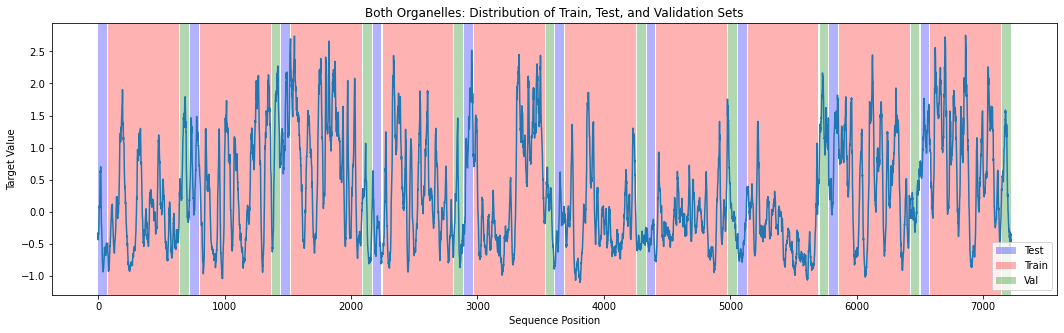

In [ ]:
# plot parts of sequences found in each set

fig = plt.figure(figsize=(18, 5))
fig.patch.set_facecolor('white')

plt.axvspan(test[0].index[0], test[0].index[-1], facecolor='b', alpha=0.3)
plt.axvspan(training[0].index[0], training[0].index[-1], facecolor='r', alpha=0.3)
plt.axvspan(validation[0].index[0], validation[0].index[-1], facecolor='g', alpha=0.3)

plt.legend(["Test", "Train", "Val"], loc="lower right")

for item in test[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='b', alpha=0.3)
    
for item in training[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='r', alpha=0.3)

for item in validation[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='g', alpha=0.3)
        
plt.plot(df_athal.target)  # CHANGE TO CHANGE

plt.title("Both Organelles: Distribution of Train, Test, and Validation Sets")  # CHANGE TO CHANGE
plt.xlabel("Sequence Position")
plt.ylabel("Target Value")

plt.show()

In [ ]:
train = pd.concat(training)
train["set"] = "train"

val = pd.concat(validation)
val["set"] = "val"

test = pd.concat(test)
test["set"] = "test"

In [ ]:
# create final dataset
final = pd.concat([train, val, test])

In [ ]:
final.sort_values(["ref", "start_coord"])

,ref,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target,set
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21,-0.326286,test
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88,-0.432610,test
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88,-0.385478,test
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88,-0.330750,test
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67,-0.341424,test
...,...,...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80,-0.361640,val
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76,-0.346007,val
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82,-0.434803,val
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32,-0.457397,val


In [ ]:
final = final.sort_index()

In [ ]:
final

,ref,start_coord,end_coord,sequence,raw_control_coverage,raw_treatment_coverage,norm_control_coverage,norm_treatment_coverage,target,set
0,AC002387.3,0,153,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,4262,7216,1400.73,1756.21,-0.326286,test
1,AC002387.3,17,170,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,4504,8209,1480.27,1997.88,-0.432610,test
2,AC002387.3,34,187,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,4975,8776,1635.07,2135.88,-0.385478,test
3,AC002387.3,51,204,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,5523,9380,1815.17,2282.88,-0.330750,test
4,AC002387.3,68,221,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,5854,10016,1923.96,2437.67,-0.341424,test
...,...,...,...,...,...,...,...,...,...,...
7218,AC002387.3,122706,122859,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,5304,9203,1743.19,2239.80,-0.361640,val
7219,AC002387.3,122723,122876,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,4926,8455,1618.96,2057.76,-0.346007,val
7220,AC002387.3,122740,122893,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,4461,8143,1466.14,1981.82,-0.434803,val
7221,AC002387.3,122757,122910,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,4005,7426,1316.27,1807.32,-0.457397,val


In [ ]:
final = final[["sequence", "target", "set"]]

In [ ]:
final

,sequence,target,set
0,GAATTCTTAAGATTGATCTGAGTTTTCCTCTTACACCGAATGTTTC...,-0.326286,test
1,CTGAGTTTTCCTCTTACACCGAATGTTTCAGAAGAAGCCAAAAATC...,-0.432610,test
2,ACCGAATGTTTCAGAAGAAGCCAAAAATCTTATCAGTCAGGTACAC...,-0.385478,test
3,AAGCCAAAAATCTTATCAGTCAGGTACACACCCAACCAAGCTAAAG...,-0.330750,test
4,AGTCAGGTACACACCCAACCAAGCTAAAGCATACCCACAACGACTC...,-0.341424,test
...,...,...,...
7218,ACATGATCAACAAAAGGTACTTACTTCTTCTTGTCTATATTTGGGA...,-0.361640,val
7219,TACTTACTTCTTCTTGTCTATATTTGGGACTTCACTTTTCTCAGCC...,-0.346007,val
7220,CTATATTTGGGACTTCACTTTTCTCAGCCTTTTCCACAATCACCTG...,-0.434803,val
7221,CTTTTCTCAGCCTTTTCCACAATCACCTGCAACCAAACTACAATGT...,-0.457397,val


In [ ]:
final.to_csv("data/processed/arabidopsis_bac_10chunks.csv", index=False)